In [98]:
import matplotlib.pyplot as plt
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import random

In [99]:
T = 18
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)
mass_ = 30

In [100]:
# BLUE
# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_td_waveform(
    approximant="IMRPhenomT", mass1=mass_, mass2=mass_, f_lower=flow, delta_t=delta_t
)

hp.resize(73728)
hc.resize(73728)
hp.roll(len(hp) // 2)
scale = 1900
hp /= scale

psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
snr_array = []
x_array = []
for x in range(400):
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=x)
    noise._epoch = hp._epoch
    signal = hp + noise

    snr = pycbc.filter.matched_filter(hc, signal, psd=psd, low_frequency_cutoff=flow)

    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)

    snr_array.append(snr_peak)
    x_array.append(x)
    print(x, snr_peak)
    x += 1
#   print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

0 20.1771597339513
1 17.76236940110571
2 20.957830155673797
3 18.53047869691153
4 18.683117481057728
5 17.118072297386174
6 18.64905269493227
7 17.45808231816891
8 19.023755731643625
9 18.237581800284513
10 19.732407438759147
11 19.91856137562466
12 18.99674519930253
13 18.873010806100137
14 18.684131064887996
15 18.769595541581186
16 18.141879175002252
17 18.215412035739234
18 18.055183985114883
19 18.967399344500905
20 19.052093079139883
21 20.703768382698268
22 17.9788232945781
23 18.053648853420544
24 17.473964443756753
25 20.02067552088309
26 19.331502335358675
27 18.555897532466407
28 17.180756997594262
29 17.403280934942963
30 18.139816378213464
31 18.361067403288285
32 18.674602103431845
33 17.933776219521366
34 15.817826471748637
35 18.230944699455957
36 17.415202285673793
37 17.817633574014426
38 20.564036366263387
39 17.029808742004185
40 15.647863290897636
41 18.800775888642853
42 19.15846284375044
43 19.53868002903544
44 19.299988234171362
45 18.410424138192212
46 18.19967

In [101]:
# RED
# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_td_waveform(
    approximant="IMRPhenomT", mass1=mass_, mass2=mass_, f_lower=flow, delta_t=delta_t
)
hp.resize(73728)
hc.resize(73728)
hp.roll(len(hp) // 2)
scale = 2300
hp /= scale
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)


snr_array_1 = []
x_array_1 = []
for x in range(400):
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=x)
    noise._epoch = hp._epoch
    signal = hp + noise

    snr = pycbc.filter.matched_filter(hc, signal, psd=psd, low_frequency_cutoff=flow)

    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    # if snr_peak < 17 and snr_peak > 14:
    snr_array_1.append(snr_peak)
    x_array_1.append(x)
    print(x, snr_peak)
    x += 1
#   print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

0 16.967819136291936
1 14.544525774268946
2 17.749960654794222
3 15.305178441383193
4 15.456555481634222
5 13.972882126756748
6 15.42621578614906
7 14.28532181307279
8 15.798305892252527
9 15.01348726879695
10 16.51909080350889
11 16.691930671962037
12 15.78617137080965
13 15.647547216850333
14 15.483815862632548
15 15.544907292040078
16 14.91529613853832
17 14.990014958639959
18 14.829361356728459
19 15.741168536268537
20 15.826714458140355
21 17.50222956451772
22 14.776313401783145
23 14.834008063374025
24 14.24726671337285
25 16.80825056444647
26 16.10570846896074
27 15.331381434703006
28 13.9565549035421
29 14.176739811921548
30 14.91452296894158
31 15.137680521124198
32 15.447897111817149
33 14.711236769044216
34 12.594032695652283
35 15.024754150410406
36 14.223175361727868
37 14.593917999484974
38 17.357019145227465
39 13.822120498050596
40 12.43568154739077
41 15.579617511036044
42 15.961266874022954
43 16.324065478501055
44 16.078743422416068
45 15.201979916360663
46 15.015973

In [102]:
# GREEN
# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_td_waveform(
    approximant="IMRPhenomT", mass1=mass_, mass2=mass_, f_lower=flow, delta_t=delta_t
)

hp.resize(73728)
hc.resize(73728)
hp.roll(len(hp) // 2)
scale = 2850
hp /= scale

psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
snr_array_2 = []
x_array_2 = []
for x in range(400):
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=x)
    noise._epoch = hp._epoch
    signal = hp + noise

    snr = pycbc.filter.matched_filter(hc, signal, psd=psd, low_frequency_cutoff=flow)

    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)

    snr_array_2.append(snr_peak)
    x_array_2.append(x)
    print(x, snr_peak)
    x += 1
#   print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

0 14.062149310648271
1 11.599179679471117
2 14.81000715892506
3 12.349314862060563
4 12.498955214064116
5 11.095150200009568
6 12.473722427865438
7 11.395013845725352
8 12.842213788976863
9 12.059311358195233
10 13.57896743889238
11 13.73423173083919
12 12.852724155147033
13 12.691443144414817
14 12.553925852136029
15 12.589867529117623
16 11.970474143466856
17 12.034034366704933
18 11.87279614162159
19 12.784016898085113
20 12.872663435651369
21 14.576320053182526
22 11.843970243798433
23 11.897588878749788
24 11.289482606535211
25 13.869368062540303
26 13.149139416310199
27 12.37914053642573
28 11.002344537098299
29 11.219178533910602
30 11.958690523487627
31 12.184469496160018
32 12.490100924242295
33 11.759267118403566
34 9.654934278525323
35 12.087256131749221
36 11.314464552776005
37 11.640318675178708
38 14.417886206533034
39 10.88223058536664
40 9.514074821574033
41 12.629393433710547
42 13.035911504782133
43 13.382464275908559
44 13.128307652456938
45 12.260994279454374
46 12.

In [103]:
# YELLOW
# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_td_waveform(
    approximant="IMRPhenomT", mass1=mass_, mass2=mass_, f_lower=flow, delta_t=delta_t
)

hp.resize(73728)
hc.resize(73728)
hp.roll(len(hp) // 2)
scale = 3650
hp /= scale

psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
snr_array_3 = []
x_array_3 = []
for x in range(400):
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=x)
    noise._epoch = hp._epoch
    signal = hp + noise

    snr = pycbc.filter.matched_filter(hc, signal, psd=psd, low_frequency_cutoff=flow)

    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)

    snr_array_3.append(snr_peak)
    x_array_3.append(x)
    print(x, snr_peak)
    x += 1
#   print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

0 11.409343535406821
1 8.910538349747787
2 12.116217456107409
3 9.641148452290903
4 9.788259365800007
5 8.535331471904692
6 9.770421314859387
7 8.804353425956593
8 10.133668878330898
9 9.353661396919094
10 10.885039007243087
11 11.02338427917398
12 10.167995596095741
13 9.985240358547111
14 9.87443164963282
15 9.882862888802842
16 9.274879742729338
17 9.325731689601046
18 9.16640019343298
19 10.07395989818751
20 10.17845015326889
21 11.9014997236133
22 9.161720026443067
23 9.209820813528617
24 8.589077460261537
25 11.18448269800221
26 10.439893696033797
27 9.686849408592199
28 8.296901087641006
29 8.508561902492563
30 9.257519372944683
31 9.480204921118625
32 9.779121532165716
33 9.056970162115167
34 6.962661795299504
35 9.397315765260062
36 8.677673939372967
37 8.935627471114886
38 11.72491854741605
39 8.18849448692642
40 6.858912345058961
41 9.935591853639739
42 10.402536240846771
43 10.694176075212672
44 10.427736431700206
45 9.565538658925119
46 9.464490267005157
47 10.717075277369

In [104]:
# BLUE
# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_td_waveform(
    approximant="IMRPhenomT", mass1=mass_, mass2=mass_, f_lower=flow, delta_t=delta_t
)

hp.resize(73728)
hc.resize(73728)
hp.roll(len(hp) // 2)
scale = 5200
hp /= scale

psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
snr_array_4 = []
x_array_4 = []
for x in range(400):
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=x)
    noise._epoch = hp._epoch
    signal = hp + noise

    snr = pycbc.filter.matched_filter(hc, signal, psd=psd, low_frequency_cutoff=flow)

    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)

    snr_array_4.append(snr_peak)
    x_array_4.append(x)
    print(x, snr_peak)
    x += 1
#   print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

0 8.612625218458865
1 6.0867812386470765
2 9.282007464336045
3 6.767879582352445
4 6.911717869577038
5 5.963079585042947
6 6.906444278816141
7 6.176740984329847
8 7.259517374859274
9 6.485476011113612
10 8.026254629145672
11 8.14488740843853
12 7.3260247975326855
13 7.124958920862037
14 7.044460639832447
15 7.011722344688428
16 6.412657067848973
17 6.452316641467645
18 6.308048800294362
19 7.196973939540557
20 7.319316805303992
21 9.075173136076822
22 6.326723664205938
23 6.367089634723717
24 5.72645194753226
25 8.363171616534636
26 7.564365749752094
27 6.830973631147431
28 5.4301219256038795
29 5.630620189870328
30 6.400315355659357
31 6.614635577265669
32 6.900398009517218
33 6.203092356866493
34 4.329650703070539
35 6.561929868674834
36 5.95117960025221
37 6.069735425187547
38 8.898165549464668
39 5.375505040309471
40 4.125961941430251
41 7.1021369574360325
42 7.620938766059817
43 7.856631047401953
44 7.5682117230274395
45 6.736204632970443
46 6.75231413528576
47 7.948185471165382
4

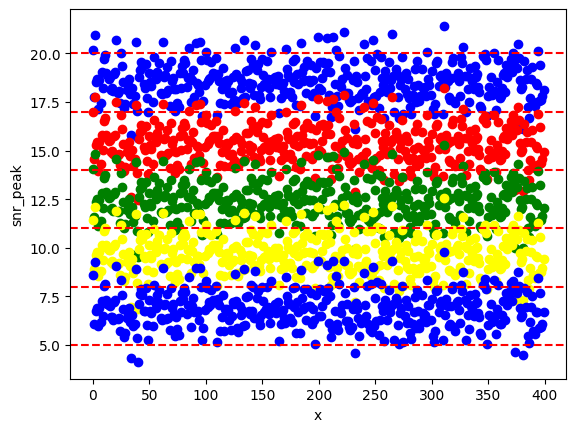

In [105]:
plt.plot(x_array, snr_array, "o", color="blue")
plt.plot(x_array_1, snr_array_1, "o", color="red")
plt.plot(x_array_2, snr_array_2, "o", color="green")
plt.plot(x_array_3, snr_array_3, "o", color="yellow")
plt.plot(x_array_4, snr_array_4, "o", color="blue")

plt.axhline(y=20, color="r", linestyle="--")
plt.axhline(y=17, color="r", linestyle="--")
plt.axhline(y=14, color="r", linestyle="--")
plt.axhline(y=11, color="r", linestyle="--")
plt.axhline(y=8, color="r", linestyle="--")
plt.axhline(y=5, color="r", linestyle="--")

plt.xlabel("x")
plt.ylabel("snr_peak")
plt.background_color = "black"
plt.show()

17 to 20 : 1900 //
14 to 17 : 2300 //
11 to 14 : 2850 //
8 to 11 : 3650 //
5 to 8 : 5200//
